# Text Classification Demo

To test a text classification to see if it can match IFS PartNo with G+ types

In [5]:
# use natural language toolkit
import nltk
from nltk.corpus import stopwords

import pandas as pd
import csv
from sklearn import preprocessing
import re
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

### Import Training Data

Contains Class as PartNo, Sentence as ModelDescription. 
Convert to DataFrame

In [16]:
trainingData = pd.read_csv('..\\DatasetForTesting\\Train_Mer_AKlasse_ModelDesc.csv', sep =';')
#print(trainingData)

In [7]:
#Helping classes

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

def splitting(inputstring):
    items = []
    #Matches on strings that starts with a letter and contains numbers. 
    match = re.match(r"([a-z]+)([0-9]+)([a-z]+)?", inputstring, re.I)
    if match:
        for group in match.groups():
            if group is not None:
                items.append(group)
        return items

In [8]:
# capture unique words in the training corpus
corpus_words = {}
class_words = {}
# turn a list into a set (of unique items) and then a list again (this removes duplicates)
classes = list(set([row['PartNo'] for index, row in trainingData.iterrows()]))

for c in classes:
    # prepare a list of words within each class
    class_words[c] = []

# loop through each sentence in our training data
for index, row in trainingData.iterrows():
    # tokenize each sentence into words
    word_tokenized = nltk.word_tokenize(row['ModelDescription'])
    
    for word in word_tokenized:               
        #lowercase each word
        word_lower = word.lower()
        
        #check if word contains letters and numbers, and are longer than 2
        if hasNumbers(word_lower) and len(word_lower) > 2:
            #Splitt into separate words
            new_words = splitting(word_lower)
            if new_words is not None:
                for w in new_words:
                    word_tokenized.append(w)
            
        # have we not seen this word already?
        if word_lower not in corpus_words:
            corpus_words[word_lower] = 1
        else:
            corpus_words[word_lower] += 1

        # add the word to our words in class list
        class_words[row['PartNo']].extend([word_lower])

# we now have each stemmed word and the number of occurances of the word in our training corpus (the word's commonality)
#print ("Corpus words and counts: %s \n" % corpus_words)
# also we have all words in each class
print ("Class words: %s" % class_words)

Class words: {'A250 4M': ['mercedes-benz', 'a-klasse', 'a250', '4matic', 'a', '250', 'mercedes-benz', 'a-klasse', 'a250', '4m', 'a', '250'], 'AMG A35 4M': ['mercedes-benz', 'a-klasse', 'amg', 'a35', '4m', 'a', '35'], 'AMG GT 43': ['mercedes-benz', 'amg', 'amg', 'gt', '43', '4matic+'], 'AMG GT 63 S': ['mercedes-benz', 'amg', 'amg', 'gt', '63', 's', '4matic+'], 'A200CDI': ['mercedes-benz', 'a-klasse', 'a200d', 'a', '200', 'd', 'mercedes-benz', 'a-klasse', 'a200cdi', 'a', '200', 'cdi'], 'A180 AMGP': ['mercedes-benz', 'a-klasse', 'a180', 'amg', 'edition', 'plus', 'a', '180'], 'AMG GT C': ['mercedes-benz', 'amg', 'gt', 'amg', 'gt', 'c'], 'A200 PRO': ['mercedes-benz', 'a-klasse', 'a200', 'pro', 'a', '200'], 'A200 PROP': ['mercedes-benz', 'a-klasse', 'a200', 'prop', 'a', '200'], 'AMG GT C C': ['mercedes-benz', 'amg', 'amg', 'gt', 'c', 'coupe'], 'AMG GT 53': ['mercedes-benz', 'amg', 'amg', 'gt', '53', '4matic+'], 'AMG GT': ['mercedes-benz', 'amg', 'gt', 'amg', 'gt'], 'A160CDI': ['mercedes-benz

In [9]:
print ("Class words: %s" % class_words['A200CDI 4M'])

Class words: ['mercedes-benz', 'a-klasse', 'a200cdi', '4m', 'a', '200', 'cdi', 'mercedes-benz', 'a-klasse', 'a200cdi', '4matic', 'a', '200', 'cdi']


In [10]:
# calculate a score for a given class taking into account word commonality
def calculate_class_score_commonality(sentence, class_name, show_details=False):
    score = 0
    # tokenize each word in our new sentence
    for word in nltk.word_tokenize(sentence):
        # check to see if the stem of the word is in any of our classes
        if word.lower() in class_words[class_name]:
            # treat each word with relative weight
            score += (1 / corpus_words[word.lower()])

            if show_details:
                print("class_name: ", class_name)
                print ("   match: %s (%s)" % (word.lower(), 1 / corpus_words[word.lower()]))
    return score

In [11]:
# return the class with highest score for sentence
def classify(sentence, details=False):
    high_class = None
    high_score = 0
    # loop through our classes
    for c in class_words.keys():
        # calculate score of sentence for each class
        score = calculate_class_score_commonality(sentence, c, show_details=details)
        # keep track of highest score
        if score > high_score:
            high_class = c
            high_score = score

    #return high_class, high_score
    return {"class":high_class, "score":high_score, "sentence": sentence}

### Test the solution

In [12]:
#classify("Citroen Berlingo BHDi PROFF 100 man. L1")
classify("A250 4MATIC aut", False)

{'class': 'A250 4M', 'score': 0.45, 'sentence': 'A250 4MATIC aut'}

## Create Test Set

In [76]:
spamReader = csv.reader(open('..\\DatasetForTesting\\Test_Gjensidige_MerAKlasse_With_Classes.csv', 
                            newline=''), delimiter=';', quotechar='|')

test_data = []

for row in spamReader:
    #ModelDesc is first row
    test_data.append(row[0])

#remove frist class as it is the csv headers
del test_data[0]

print(len(test_data))
print(test_data)

77
['A160 aut', 'A160 aut', 'A160 aut', 'A160', 'A160', 'A160', 'A160d aut', 'A160d aut', 'A160d aut', 'A160d', 'A160d', 'A160d', 'A180 aut', 'A180 aut', 'A180 aut', 'A180', 'A180', 'A180', 'A180d aut Kombicoupe', 'A180d aut Kombicoupe', 'A180d aut', 'A180d aut', 'A180d', 'A180d', 'A180d', 'A200 AMG Edition aut (K)', 'A200 AMG Edition aut', 'A200 AMG Edition Plus aut (K)', 'A200 AMG Edition Plus aut', 'A200 aut Kombicoupe', 'A200 aut Kombicoupe', 'A200 aut', 'A200 aut', 'A200 Progressive Edition aut (K)', 'A200 Progressive Edition aut', 'A200 Progressive Edition Plus aut (K)', 'A200 Progressive Edition Plus aut', 'A200', 'A200', 'A200', 'A200d 4MATIC aut', 'A200d 4MATIC aut', 'A200d 4MATIC aut', 'A200d aut', 'A200d aut', 'A200d aut', 'A200d', 'A200d', 'A200d', 'A220 4MATIC', 'A220 4MATIC', 'A220 4MATIC', 'A220d 4MATIC aut', 'A220d 4MATIC aut', 'A220d 4MATIC aut', 'A220d', 'A220d', 'A220d', 'A250 4MATIC aut', 'A250 4MATIC aut', 'A250 4MATIC aut', 'A250 aut Kombicoupe', 'A250 aut Kombico

## Score the model 

In [77]:
# Score all test data
result = []
for s in test_data:
    r = classify(s)
    result.append(r)


df = pd.DataFrame(result)
print(df)

#Save result
#df.to_csv("output.csv",sep = ";")

            class     score                       sentence
0            A160  1.000000                       A160 aut
1            A160  1.000000                       A160 aut
2            A160  1.000000                       A160 aut
3            A160  1.000000                           A160
4            A160  1.000000                           A160
5            A160  1.000000                           A160
6         A160CDI  1.000000                      A160d aut
7         A160CDI  1.000000                      A160d aut
8         A160CDI  1.000000                      A160d aut
9         A160CDI  1.000000                          A160d
10        A160CDI  1.000000                          A160d
11        A160CDI  1.000000                          A160d
12       A180 AMG  0.333333                       A180 aut
13       A180 AMG  0.333333                       A180 aut
14       A180 AMG  0.333333                       A180 aut
15       A180 AMG  0.333333                           A1

In [78]:
count = {}

for data in result:
    c = data['class']
    if c not in count:
        count[c] = 1
    else:
        count[c] += 1    
        
print("Total count:", count)

Total count: {'A160': 6, 'A160CDI': 6, 'A180 AMG': 6, 'A180D': 7, 'A200 AMGP': 8, 'A200 PROP': 7, 'A200CDI': 9, 'A220 4M': 3, 'A220CDI 4M': 6, 'A250 4M': 10, 'A250 SPORT 4M': 9}


## Evaluate With Confution Matrix
### Needs a solution (real class) that must be added manually 

18
Confusion matrix, without normalization


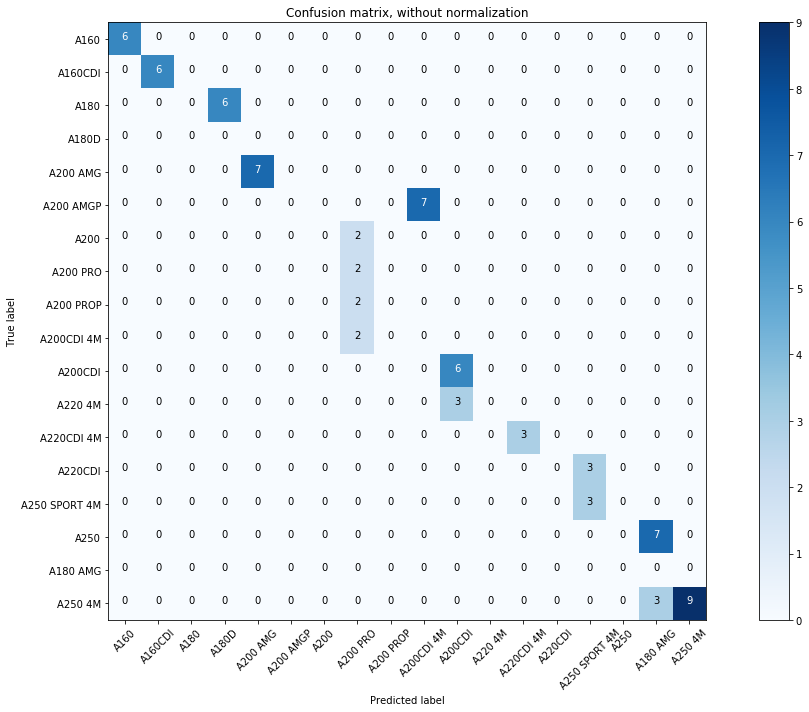

In [79]:
gjensidige_classified = pd.read_csv('..\\DatasetForTesting\\Test_Gjensidige_MerAKlasse_With_Classes.csv',sep=';')

#Totalt 16 classer, alle macedes A-klasse
#classes = pd.read_csv('C:\\Users\\godes\\Desktop\\OFV_REGISTRERINGER_VIN_SAMI\\listofClassesfromMercedesGjensidige.csv',sep=',')

true = gjensidige_classified['Class'] #the class sett by me
pred = df['class'] #the predicted class

#Find all uniqr classes used in the prediction.
class_names = []  #classes['Class'] # class list

for c in true:
    if c not in class_names:
        class_names.append(c)

for c in pred:
    if c not in class_names:
        class_names.append(c)
print(len(class_names))

# Compute confusion matrix
cnf_matrix = confusion_matrix(true, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()


In [20]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

In [303]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['score'].max()
        min_value = 0 #df['score'].min()
        result['score_norm'] = (df['score'] - min_value) / (max_value - min_value)
    return result
